# Color system

In OmicVerse, we offer a color system based on Eastern aesthetics, featuring 384 representative colors derived from the Forbidden City. We will utilize these colors in combination for future visualizations.

All color come from the book: "中国传统色：故宫里的色彩美学" (ISBN: 9787521716054)

In [1]:
%%capture
%cd ../../../
%load_ext autoreload
%autoreload 2

In [2]:
import omicverse as ov
import scanpy as sc
#import scvelo as scv
ov.plot_set(font_path='Arial')
!date

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.

2025年 07月 21日 星期一 10:21:28 CST


We utilized single-cell RNA-seq data (GEO accession: GSE95753) obtained from the dentate gyrus of the hippocampus in mouse.

In [3]:
adata = ov.read('data/DentateGyrus/10X43_1.h5ad')
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

## Understanding the Color System

In OmicVerse, we offer a color system based on Eastern aesthetics, featuring 384 representative colors derived from the Forbidden City. We will utilize these colors in combination for future visualizations.

In [4]:
fb=ov.pl.ForbiddenCity()

In [5]:
from IPython.display import HTML
HTML(fb.visual_color(loc_range=(0,384),
                    num_per_row=24))

人籁,青粲,翠缥,水龙吟,碧山,石发,菉竹,庭芜绿,葱倩,漆姑,翠微,芰荷,青青,翠虬,官绿,油绿,莓莓,螺青,春辰,麴尘,欧碧,苍葭,兰苕,青玉案
,,,,,,,,,,,,,,,,,,,,,,,
碧滋,瓷秘,筠雾,竹香子,鸣珂,琬琰,出岫,王刍,春碧,执大象,青圭,绿沈,风入松,荩篋,绞衣,素綦,苍筤,天缥,卵色,沧浪,葭菼,山岚,冰台,青古
,,,,,,,,,,,,,,,,,,,,,,,
醽醁,渌波,青楸,缥碧,翠涛,青梅,雀梅,苔古,蕉月,干山翠,翕赩,结绿,绿云,丹罽,黄丹,檎丹,银朱,洛神珠,珊瑚赫,朱孔阳,丹雘,水华朱,胭脂虫,朱樱
,,,,,,,,,,,,,,,,,,,,,,,
大繎,顺圣,爵头,麒麟竭,苕荣,扶光,十样锦,海天霞,驿刚,朱颜酡,赦霞,赦尾,缙云,小红,琼琚,岱赭,朱柿,艳炽,鹤顶红,赤缇,纁黄,棠梨,朱殷,石榴裙
,,,,,,,,,,,,,,,,,,,,,,,
朱草,赤灵,佛赤,綪茷,朱湛,丹秫,木兰,杨妃,盈盈,银红,粉米,桃夭,水红,夕岚,彤管,咸池,莲红,雌霓,縓缘,长春,渥赭,红䵂,紫梅,绛纱
,,,,,,,,,,,,,,,,,,,,,,,
茹藘,美人祭,唇脂,牙绯,鞓红,葡萄褐,蚩尤旗,紫矿,紫诰,苏方,霁红,蜜褐,福色,黪紫,龙膏烛,苏梅,琅环紫,胭脂水,紫茎屏风,红踯躅,胭脂紫,魏红,紫府,魏紫


we can get a color using `get_color`

In [6]:
fb.get_color(name='凝夜紫')

,num,name,name_en,color_rgb,color_html
161,161,凝夜紫,Noctilucence,"(68, 36, 84)",#442454


## Default Colormap

We have provided a range of default colors including `green`, `red`, `pink`, `purple`, `yellow`, `brown`, `blue`, and `grey`. Each of these colors comes with its own set of sub-colormaps, providing a more granular level of color differentiation.

Here's a breakdown of the sub-colormaps available for each default color:

- **Green**: 
  - `green1`: `Forbidden_Cmap(range(1, 19))`
  - `green2`: `Forbidden_Cmap(range(19, 41))`
  - `green3`: `Forbidden_Cmap(range(41, 62))`

- **Red**: 
  - `red1`: `Forbidden_Cmap(range(62, 77))`
  - `red2`: `Forbidden_Cmap(range(77, 104))`

- **Pink**: 
  - `pink1`: `Forbidden_Cmap(range(104, 134))`
  - `pink2`: `Forbidden_Cmap(range(134, 148))`

- **Purple**: 
  - `purple1`: `Forbidden_Cmap(range(148, 162))`
  - `purple2`: `Forbidden_Cmap(range(162, 176))`

- **Yellow**: 
  - `yellow1`: `Forbidden_Cmap(range(176, 196))`
  - `yellow2`: `Forbidden_Cmap(range(196, 207))`
  - `yellow3`: `Forbidden_Cmap(range(255, 276))`

- **Brown**: 
  - `brown1`: `Forbidden_Cmap(range(207, 228))`
  - `brown2`: `Forbidden_Cmap(range(228, 246))`
  - `brown3`: `Forbidden_Cmap(range(246, 255))`
  - `brown4`: `Forbidden_Cmap(range(276, 293))`

- **Blue**: 
  - `blue1`: `Forbidden_Cmap(range(293, 312))`
  - `blue2`: `Forbidden_Cmap(range(312, 321))`
  - `blue3`: `Forbidden_Cmap(range(321, 333))`
  - `blue4`: `Forbidden_Cmap(range(333, 339))`

- **Grey**: 
  - `grey1`: `Forbidden_Cmap(range(339, 356))`
  - `grey2`: `Forbidden_Cmap(range(356, 385))`

Each main color can be represented as a combination of its sub-colormaps:

- `green = green1 + green2 + green3`
- `red = red1 + red2`
- `pink = pink1 + pink2`
- `purple = purple1 + purple2`
- `yellow = yellow1 + yellow2 + yellow3`
- `brown = brown1 + brown2 + brown3 + brown4`
- `blue = blue1 + blue2 + blue3 + blue4`
- `grey = grey1 + grey2`

These colormaps can be utilized in various applications where color differentiation is necessary, providing flexibility in visual representation.

`palette` is the argument we need to revise

<Axes: title={'center': 'clusters'}, xlabel='X_umap1', ylabel='X_umap2'>

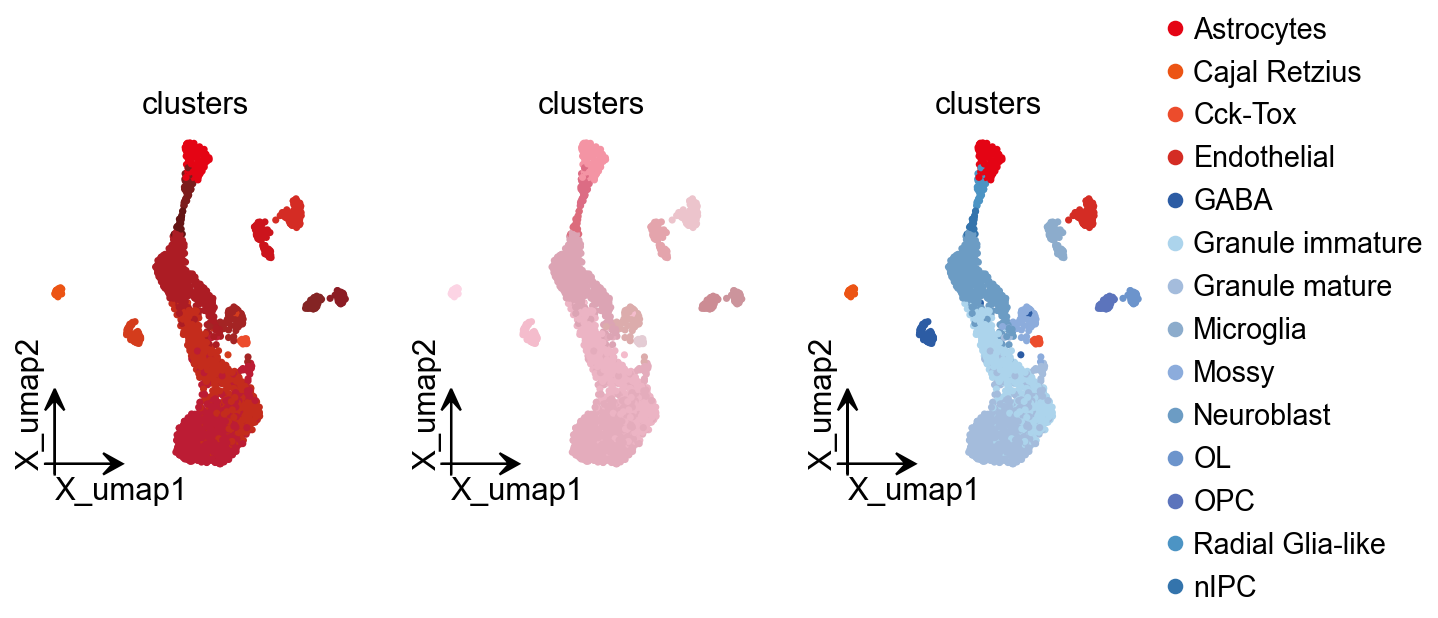

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,3,figsize=(9,3)) 
ov.pl.embedding(adata,
                   basis='X_umap',
                    frameon='small',
                   color=["clusters"],
                   palette=fb.red[:],
                   ncols=3,
                show=False,
                legend_loc=None,
                    ax=axes[0])

ov.pl.embedding(adata,
                   basis='X_umap',
                    frameon='small',
                   color=["clusters"],
                   palette=fb.pink1[:],
                   ncols=3,show=False,
                legend_loc=None,
                    ax=axes[1])

ov.pl.embedding(adata,
                   basis='X_umap',
                    frameon='small',
                   color=["clusters"],
                   palette=fb.red1[:4]+fb.blue1,
                   ncols=3,show=False,
                    ax=axes[2])




<Axes: title={'center': 'clusters'}, xlabel='X_umap1', ylabel='X_umap2'>

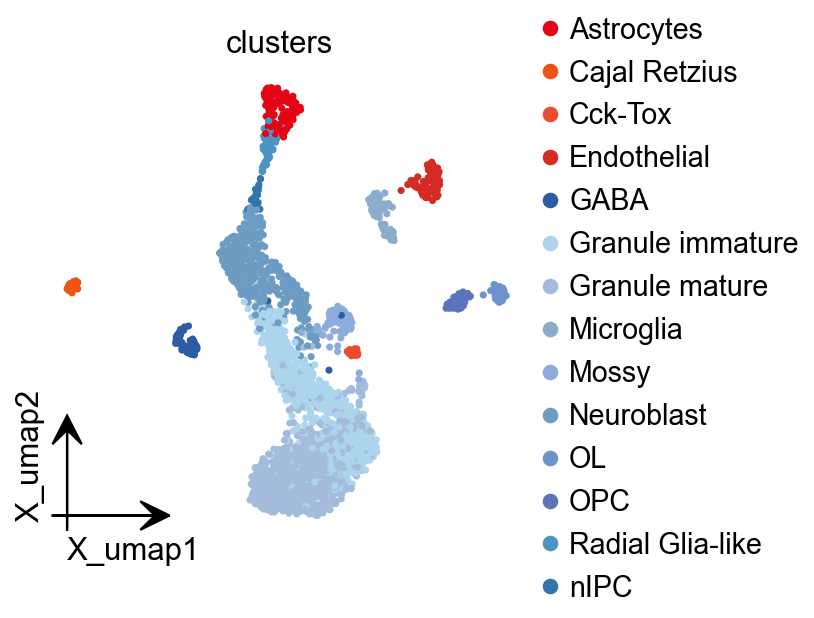

In [8]:
color_dict={'Astrocytes': '#e40414',
 'Cajal Retzius': '#ec5414',
 'Cck-Tox': '#ec4c2c',
 'Endothelial': '#d42c24',
 'GABA': '#2c5ca4',
 'Granule immature': '#acd4ec',
 'Granule mature': '#a4bcdc',
 'Microglia': '#8caccc',
 'Mossy': '#8cacdc',
 'Neuroblast': '#6c9cc4',
 'OL': '#6c94cc',
 'OPC': '#5c74bc',
 'Radial Glia-like': '#4c94c4',
 'nIPC': '#3474ac'}

ov.pl.embedding(adata,
                   basis='X_umap',
                    frameon='small',
                   color=["clusters"],
                   palette=color_dict,
                   ncols=3,show=False,
                    )



## Segmented Colormap

When we need to create a continuous color gradient, we will use another function: `get_cmap_seg`, and we can combine the colors we need for visualization.

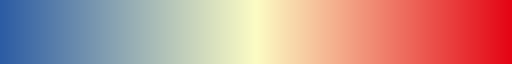

In [9]:
colors=[
    fb.get_color_rgb('群青'),
    fb.get_color_rgb('半见'),
    fb.get_color_rgb('丹罽'),
]
fb.get_cmap_seg(colors)

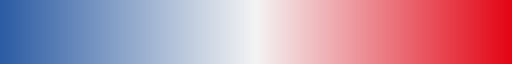

In [10]:
colors=[
    fb.get_color_rgb('群青'),
    fb.get_color_rgb('山矾'),
    fb.get_color_rgb('丹罽'),
]
fb.get_cmap_seg(colors)

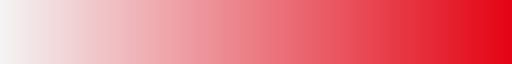

In [11]:
colors=[
    fb.get_color_rgb('山矾'),
    fb.get_color_rgb('丹罽'),
]
fb.get_cmap_seg(colors)

<Axes: title={'center': 'Sox7'}, xlabel='X_umap1', ylabel='X_umap2'>

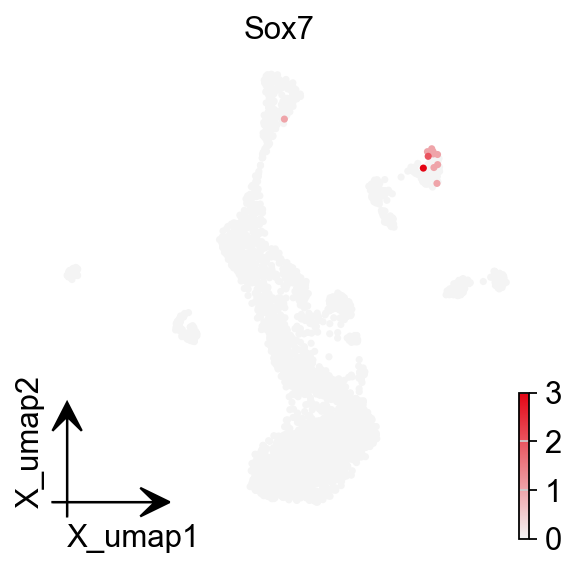

In [12]:
ov.pl.embedding(adata,
                basis='X_umap',
                frameon='small',
                color=["Sox7"],
                cmap=fb.get_cmap_seg(colors),
                ncols=3,show=False,
                #vmin=-1,vmax=1
                )
